# 2(a) Using scipy.optimize.minimize with the Nelder- Mead algorithm to determine the optimized slope and intercept parameters that fit the linear model to the data points in data_points_assign5.txt

In [25]:
#Importing necessary packages
import numpy as np
from scipy.optimize import minimize

# Defining the linear function
def linear_func(params, x):
    slope, intercept = params
    return slope * x + intercept

# Defining the objective function to be minimized
def objective(params):
    error = y - linear_func(params, x)
    return np.sum(error ** 2)

# Importing the data points from data_point_assign5.txt
x = np.array([0.0, 0.375, 0.75, 1.125, 1.5, 1.875, 2.25, 2.625, 3.0, 3.375, 3.75, 4.125, 4.5, 4.875, 5.25, 5.625, 6.0, 6.375, 6.75, 7.125, 7.5, 7.875, 8.25, 8.625, 9.0])
y = np.array([-1.8928649489983849, 2.444798491815168, 1.3296571159781247, 2.2128351501861956, 2.7476978041227533, 5.1042961952096935, 3.0045925640951308, 4.118938319884113,
              4.857215923842234, 5.522872034143456, 7.268775349501913, 5.367030669875977, 6.08912262942622, 6.531342932071977, 7.596577854129031, 9.424532353882157, 
              8.820175254267282, 10.299220857359044, 9.532385606857066, 11.079567549849163, 12.089435264933144, 10.582342154331215, 12.369656954157051, 
              13.238886051368137, 14.288782952302705])

# Seting the initial guesses for the slope and intercept parameters
params0 = [1.0, 0.0]

# Minimizing the objective function using Nelder-Mead algorithm
result = minimize(objective, params0, method = 'Nelder-Mead')

# Print the optimized slope and intercept parameters
print("Optimized slope:", result.x[0])
print("Optimized intercept:", result.x[1])

Optimized slope: 1.465933856886324
Optimized intercept: 0.3644058734894138


# 2(b) Plotting the data points in data_points_assign5.txt together with the line model parameterized by the slope and intercept values you found with scipy.optimize.minimize

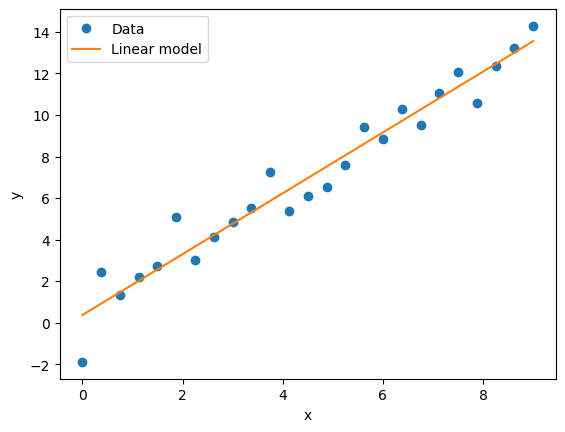

In [26]:
#Importing necessary package
import matplotlib.pyplot as plt

# Plotting the data points
plt.plot(x, y, 'o', label = 'Data')

# Plotting the line model
plt.plot(x, result.x[0] * x + result.x[1], label='Linear model')

# Adding labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Showing the plot
plt.show()

We can see that the linear model fits quite well to the data points, except the first data point (0, -1.89). The optimized slop is 1.47 and the optimized y-intercept is 0.364.

# 2(c) Using scipy.optimize.minimize with the Nelder- Mead algorithm to determine the optimized D and b parameters that fit the exponential decay model to the data points in data_points_exp_assign5.txt

Optimized D:  2.29256740180185
Optimized b:  0.496267475567606


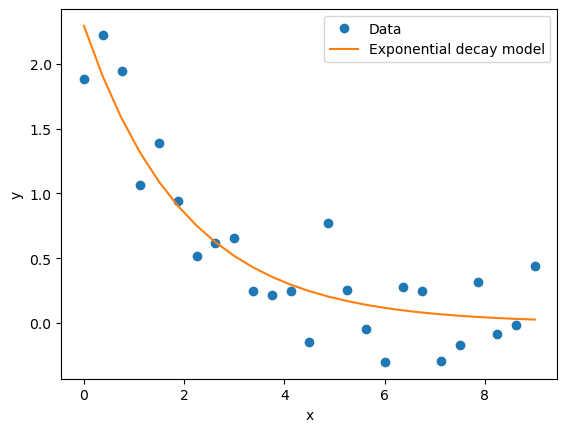

In [27]:
# Defining the exponential decay function
def exp_decay(x, D, b):
    return D * np.exp(-b * x)

# Importing the data points from data_points_exp_assign5.txt
x = np.array([0.0, 0.375, 0.75, 1.125, 1.5, 1.875, 2.25, 2.625, 3.0, 3.375, 3.75, 4.125, 4.5, 4.875, 5.25, 5.625,
              6.0, 6.375, 6.75, 7.125, 7.5, 7.875, 8.25, 8.625, 9.0])
y = np.array([1.8807764253205521, 2.2247478280250936, 1.9440157138314316, 1.06175176873268, 1.3923278838447626, 0.9404510107832217, 0.5205366005304746, 0.6179956753037176, 
              0.6541023973536029, 0.2483550046339102, 0.21302852200133734, 0.24624065995861805, -0.14909139320703657, 0.7730968624354393, 0.25836092093443686, 
              -0.04489721023697463, -0.30049692525777905, 0.2739258619432349, 0.24469446741423903, -0.29182608423281864, -0.1667502324288394, 
              0.31768355356949596, -0.08286960939958207, -0.015505083371022327, 0.4412195488754152])

# Defining the objective function to be minimized
def objective(params):
    D, b = params
    y_pred = exp_decay(x, D, b)
    return np.mean((y - y_pred)**2)

# Setting the initial guesses for D and b
params0 = [2, 1]

# Minimizing the objective function using the Nelder-Mead algorithm
result = minimize(objective, params0, method='nelder-mead')

# Printing the optimized parameters
print("Optimized D: ", result.x[0])
print("Optimized b: ", result.x[1])

# Plotting the data points and the fitted exponential decay curve
plt.plot(x, y, 'o', label='Data')
plt.plot(x, exp_decay(x, result.x[0], result.x[1]), label='Exponential decay model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

We can see the exponential decay model fits quite well to the data points, although the fitting is a bit worse than the linear model above. It is observed that the larger x is, the more scattered the data points are from the model. The optimized D is 2.29 and the optimized b is 0.496.

# 2(d) Finding the half-life of Barium-137 by using scipy.optimize.minimize with the Nelder- Mead algorithm to determine the optimized N_0 and t_half parameters that fit the exponential decay model to the data points in decay.txt

Optimized N_0: 1656.116422677202
Optimized t_half: 2.836202944973912


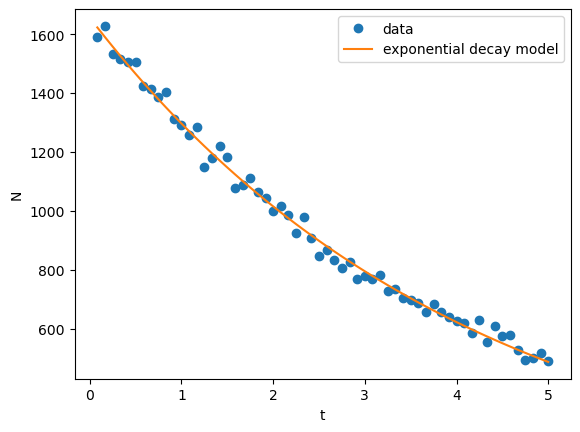

In [28]:
# Defining the exponential decay function
def exp_decay(t, N_0, t_half):
    tau = t_half / np.log(2)
    return N_0 * np.exp(-t / tau)

# Defining the objective function to minimize
def objective(params, t, N):
    N_0, t_half = params
    N_pred = exp_decay(t, N_0, t_half)
    return np.sum((N_pred - N)**2)

# Importing the data points from decay.txt
t = np.array([0.083, 0.167, 0.250, 0.333, 0.417, 0.500, 0.583, 0.667, 0.750, 0.833, 0.917, 1.000, 1.083, 1.167,
              1.250, 1.333, 1.417, 1.500, 1.583, 1.667, 1.750, 1.833, 1.917, 2.000, 2.083, 2.167, 2.250, 2.333,
              2.417, 2.500, 2.583, 2.667, 2.750, 2.833, 2.917, 3.000, 3.083, 3.167, 3.250, 3.333, 3.417, 3.500,
              3.583, 3.667, 3.750, 3.833, 3.917, 4.000, 4.083, 4.167, 4.250, 4.333, 4.417, 4.500, 4.583, 4.667,
              4.750, 4.833, 4.917, 5.000])
N = np.array([1589.000, 1628.000, 1532.000, 1515.000, 1504.000, 1506.000, 1423.000, 1415.000, 1387.000, 1405.000,
              1311.000, 1293.000, 1258.000, 1286.000, 1150.000, 1179.000, 1220.000, 1182.000, 1078.000, 1088.000,
              1112.000, 1063.000, 1043.000, 1000.000, 1018.000, 985.000, 925.000, 981.000, 908.000, 849.000,
              868.000, 835.000, 806.000, 828.000, 771.000, 781.000, 771.000, 783.000, 727.000, 734.000,
              706.000, 697.000, 688.000, 658.000, 686.000, 656.000, 639.000, 628.000, 620.000, 587.000,
              629.000, 556.000, 609.000, 576.000, 581.000, 530.000, 496.000, 501.000, 519.000, 491.000])

# Setting the initial guesses for N_0 and t_half
params0 = np.array([N[0], 3.0])

# Minimizing the objective function using the Nelder-Mead algorithm
res = minimize(objective, params0, args=(t, N), method='Nelder-Mead')

# Printing the optimized parameters
print('Optimized N_0:', res.x[0])
print('Optimized t_half:', res.x[1])

#Plotting the data points and the fitted exponential decay curve
plt.plot(t, N, 'o', label='data')
plt.plot(t, exp_decay(t, res.x[0], res.x[1]), label='exponential decay model')
plt.xlabel('t')
plt.ylabel('N')
plt.legend()
plt.show()

The exponential decay model fits extremely well to the data points. We can see that the data points are tightly packed along the curve. The optimised N_0 is 1660 and the optimised half-life t_half is 2.84 s.

# 2(e) Using scipy.optimize.curve_fit to determine the optimized parameter C that fits the quadratic model to the data points in centripetal.txt

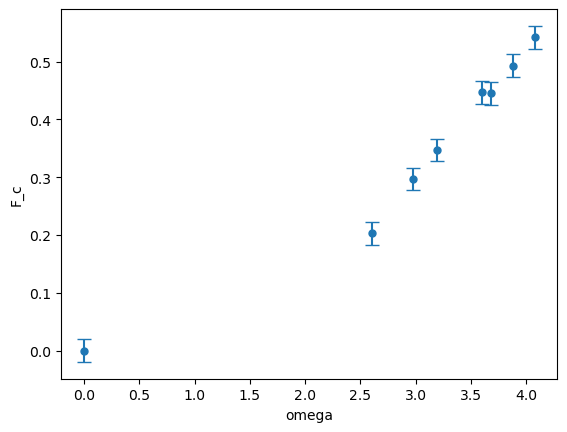

In [29]:
# Importing the data points from centripetal.txt
omega = [0, 3.596, 4.077, 2.976, 2.603, 3.877, 3.684, 3.191]
F_c = [0, 0.44688, 0.54194, 0.29694, 0.20286, 0.49294, 0.44492, 0.34692]
est_error_F = [0.0196] * len(omega)

# Plotting the graph
fig, ax = plt.subplots()
ax.errorbar(omega, F_c, yerr=est_error_F, fmt='o', capsize=5, markersize=5)

# Setting axis labels
ax.set_xlabel('omega')
ax.set_ylabel('F_c')

# Showing the graph
plt.show()

From the graph, we can see that the data points look linear except for the data point at (0,0), which fits the description from the assignment manual.

Optimized constant C: 0.033070755840306235


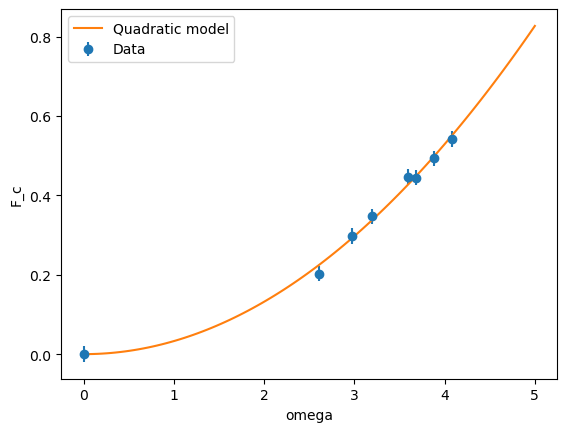

In [30]:
#Importing necessary package
from scipy.optimize import curve_fit

# Defining the quadratic model, note that C = m * R
def quad_model(x, C):
    return C * x**2

# Importing the data points from centripetal.txt
omega = np.array([0, 3.596, 4.077, 2.976, 2.603, 3.877, 3.684, 3.191])
F_c = np.array([0, 0.44688, 0.54194, 0.29694, 0.20286, 0.49294, 0.44492, 0.34692])
est_error_F = np.array([0.0196, 0.0196, 0.0196, 0.0196, 0.0196, 0.0196, 0.0196, 0.0196])

# Fitting the model to the data
p0 = [1] # Initial guess for C
bounds = ([0], [np.inf]) # Lower and upper bounds for C
popt, pcov = curve_fit(quad_model, omega, F_c, p0=p0, sigma=est_error_F, bounds=bounds)

# Printing the optimized parameters
print("Optimized constant C:", popt[0])

# Plotting the data and the fitted curve
plt.errorbar(omega, F_c, yerr=est_error_F, fmt='o', label='Data')
x = np.linspace(0, 5, 100)
y = quad_model(x, *popt)
plt.plot(x, y, label='Quadratic model')
plt.xlabel('omega')
plt.ylabel('F_c')
plt.legend()
plt.show()

We can see that again, the quadratic model fits extremely well to the data points. The optimized constant C is 0.0331. According to the assignment manual, m = 0.2 kg and R = 0.18 m. They are consistent with the optimized constant C, since C = m * R, and m * R = 0.036 which is close to the optimized value.